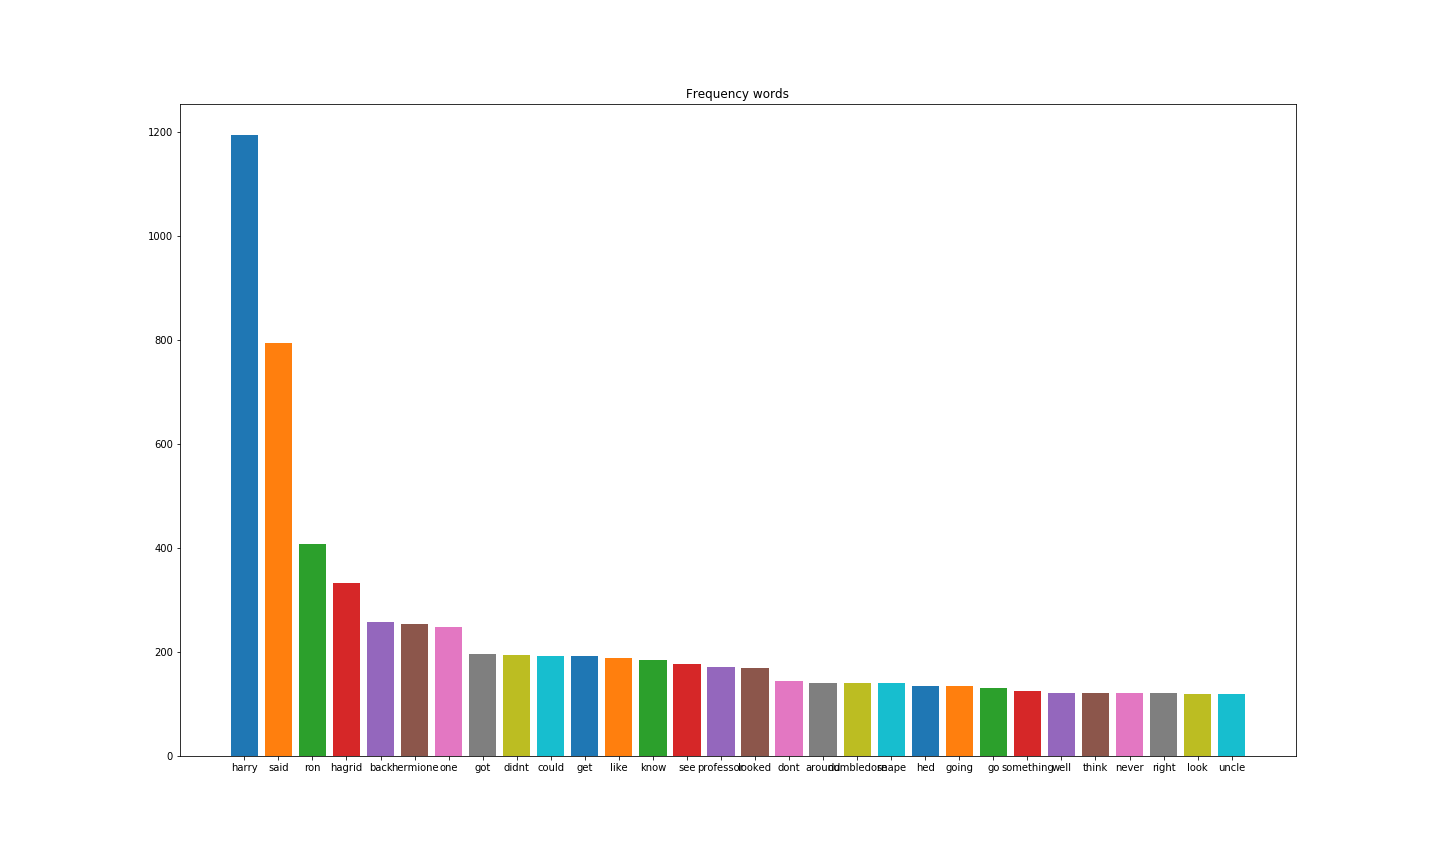

In [15]:
%matplotlib inline
# -*- coding: utf-8 -*-
# from pymystem3 import Mystem
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = [20, 12]
stopw = set(stopwords.words('english'))
punct = set(string.punctuation)
punct.add('«')
punct.add('»')


def mod_file(input_file, end_file):
    m = WordNetLemmatizer()

    dlines = ""
    with open(input_file, 'r', encoding='utf-8') as sfile:
        slines = sfile.readlines()
        for sline in slines:
            dline = ''.join(m.lemmatize(sline))
            dlines += dline

        words = ''.join(ch for ch in dlines.replace("\n", " ").lower() if ch not in punct)
        wordswrite = ''.join(ch for ch in dlines.lower() if ch not in punct)

        with open(end_file, 'w', encoding='utf-8') as dfile:
            dfile.write(wordswrite)

    return words


mod_text = mod_file("Harry_Potter_and_the_Sorcerers_Stone.txt", "changed_text.txt")
words = mod_text.split(" ")
removestop = [i for i in words if i not in stopw]
removestop = [x for x in removestop if x != '']

# calculate ipm
ipm = {i:removestop.count(i) for i in removestop}
# Sort descending
sortipm = [ [key, ipm[key]] for key in sorted(ipm, key=ipm.__getitem__, reverse=True)]

plt.title('Frequency words')
for i in range(0, 30):
    plt.bar(sortipm[i][0],sortipm[i][1], linewidth=4)

plt.show()
# for i in range(0, 30):
#     print("{0[0]}: {0[1]}".format(sortipm[i]))